In [1]:
#### Set up the libraries needed to import data
import pandas as pd
import numpy as np

from pathlib import Path


from scipy import stats
from collections import Counter

from PIL import Image  
import PIL


import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

import seaborn as sns

In [2]:
# set up file names
path = "C:\\Users\\fallest\\Google Drive\\Imperial Paper\\data\\"
file_142 = "data_142.csv"
file_147 = "data_147.csv"
file_182 = "data_182.csv"
file_192 = "data_192.csv"


file_200 = "data_200.csv"
file_208 = "data_208.csv"
file_218 = "data_218.csv"
file_219 = "data_219.csv"

In [3]:
#read in data as dataframes
data_142 = pd.read_csv(path+file_142)
data_147 = pd.read_csv(path+file_147)
data_182 = pd.read_csv(path+file_182)
data_192 = pd.read_csv(path+file_192)

data_200 = pd.read_csv(path+file_200)
data_208 = pd.read_csv(path+file_208)
data_218 = pd.read_csv(path+file_218)
data_219 = pd.read_csv(path+file_219)

In [4]:
## Get the frames and rows to be removed.  Frames removed  are bad frames, while, rows removed are dust and debris
#Rows_to_remove are the spots (originally rows in the lifematrix)

#uncut 142
rows_to_remove_142 = [316,320,321,331,486,521,543,544,546,549,550,551,553,558,560,561,562,579,594,601,602,604,608,609,610];
frames_to_remove_142 = [169,174,305,354,401,402,403,404,409,427,440,441,442];

#uncut 147:
rows_to_remove_147 = [371,372,381,483,502,850,967,1437,1438,1439,1444,1445,1447,1448,1451,1453,1457,1459,
                      1462,1463,1464,1465,1537,1538,1540,1557,1558,1559,1561,1562,1566,1567,1568,1569,1570];
frames_to_remove_147 = [644,661,663,664];

#cut 182:
frames_to_remove_182 = [129,350,421,422,423,424,425,*range(441,490+1)]; #using the plus 1 notation, the last frame of the set to remove is 490
rows_to_remove_182 = 0;

#cut 192:
rows_to_remove_192 = [60,62,73,78,81,84,96,105,108,111,112,124,125,126,129,140,143,145,153,
                      157,158,160,161,163,164,165,252,253,287,328,329,333,334,335,336,337,340,344,347,362,
                      365,367,368,371,373,374,377,378,379,382,411,422,419,433,435,436,437,438,440,442,443,444,
                      445,447,450,454,457,458,459,463,466];
frames_to_remove_192 = [*range(98,105+1),284,285,*range(369,484+1)];

#cut 200:
rows_to_remove_200 = [987,988,1080,1081,1086,*range(1097,1107+1)];
frames_to_remove_200 = [48,156,289,*range(317,361+1)];

#cut 208:
rows_to_remove_208 = [831,1187,1323,1324,1325,1327,1330,1333,1334,1341];
frames_to_remove_208 = [50,61,183,215,216,217,*range(252,297+1),307];

#uncut 218:
rows_to_remove_218 = [220,288,289,294,295,296,304,427,428,430,441,446,448,472,473,475,476,477,484,487,490,510,517,523,
                      525,527,533,534,535,536,613,616,621,622,620,625,629,630,648,675,676,677,678,679,680,687,690,691,692,
                      693,694,695,702,705,712,713,715,716,719,723,728,729,730,731,735,828,829,830,831,832,834,835,836];
frames_to_remove_218 = [20,219,278,*range(286,474+1)];  #note, this is from 286 to 474 inclusive.  You might have to change how this reads in depending on your indexing.

#uncut 219:
rows_to_remove_219 = [140,234,235,238,243,244,245,248,255,256,259,261,265,
                      267,272,274,323,324,331,332,333,336,349,350,351,352,353,356,359,
                      361,364,365,366,367,372,373,374,375,376,378,379,380,381,382,383,384,385,386,
                      387,388,392,393,394,405,404,406,407,408,409,410,411,416,420,421,422,423,424,425,
                      426,427,428,431,434,435,436,437,445,449,450,453,454,457,463,464,462,468,472,474,476,
                      477,478,479,482,483,484,486,503,507,508,510,515,516,517,519,523,524,527,528,533,534,535,
                      536,538,539,540,543,545,544,546,547,548,545,549,548,550,553,556,558,572,577,578,583,588,589,
                      590,583,592,593,594,596,601,605,606,607,608,609,610,612,613,614,618,628];
frames_to_remove_219 = [7,170,184,382,384,385];


In [5]:
#add 1 to everything, because python, not matlab
#[x+1 for x in test]
#uncut
#uncut 142
rows_to_remove_142 = [x+1 for x in rows_to_remove_142]
frames_to_remove_142 = [x+1 for x in frames_to_remove_142]

#uncut 147:
rows_to_remove_147 = [x+1 for x in rows_to_remove_147]
frames_to_remove_147 = [x+1 for x in frames_to_remove_147]

#uncut 218:
rows_to_remove_218 = [x+1 for x in rows_to_remove_218]
frames_to_remove_218 = [x+1 for x in frames_to_remove_218]

#uncut 219:
rows_to_remove_219 = [x+1 for x in rows_to_remove_219]
frames_to_remove_219 = [x+1 for x in frames_to_remove_219]


#cut
#cut 182
#rows_to_remove_182 = [x+1 for x in rows_to_remove_182]
frames_to_remove_182 = [x+1 for x in frames_to_remove_182]

#cut 192:
rows_to_remove_192 = [x+1 for x in rows_to_remove_192]
frames_to_remove_192 = [x+1 for x in frames_to_remove_192]

#cut 200:
rows_to_remove_200 = [x+1 for x in rows_to_remove_200]
frames_to_remove_200 = [x+1 for x in frames_to_remove_200]

#cut 208:
rows_to_remove_208 = [x+1 for x in rows_to_remove_208]
frames_to_remove_208 = [x+1 for x in frames_to_remove_208]

## Set up the functions to clean the data, and clean the data

In [6]:
#define function to remove the rows where there are dust particles
#remove rows 
def drop_by_blob(df, blob_list):
    for blob in blob_list:
        df.drop(df.loc[df['key']==blob].index, inplace=True)
    return df

In [7]:
#define function that drops bad frames
def drop_by_frame(df, frame_list):
    for frame in frame_list:
        df.drop(df.loc[df['t']==frame].index, inplace=True)
    return df

In [8]:
#clean data by dropping dust and bad frames
data_142 = drop_by_frame(drop_by_blob(data_142, rows_to_remove_142),frames_to_remove_142)
data_147 = drop_by_frame(drop_by_blob(data_147, rows_to_remove_147),frames_to_remove_147)
data_182 = drop_by_frame(data_182, frames_to_remove_182)
data_192 = drop_by_frame(drop_by_blob(data_192, rows_to_remove_192),frames_to_remove_192)

data_200 = drop_by_frame(drop_by_blob(data_200, rows_to_remove_200),frames_to_remove_200)
data_208 = drop_by_frame(drop_by_blob(data_208, rows_to_remove_208),frames_to_remove_208)
data_218 = drop_by_frame(drop_by_blob(data_218, rows_to_remove_218),frames_to_remove_218)
data_219 = drop_by_frame(drop_by_blob(data_219, rows_to_remove_219),frames_to_remove_219)

## Define the functions needed to run DBScan on the data

In [9]:
def dbscan_data_prep(df, time_point):
    #function returns an array from tuples of coordinate sets, thus an array of coordinate sets for the blobs
    data_by_time = df[df['t']==time_point] #index by the time point
    x = data_by_time['x']
    y = data_by_time['y']
    z = data_by_time['z']
    coords = list(zip(x,y,z)) #zip the coordinates together into coordinate sets
    coords_np = np.array(coords) #make a numpy array of the data
    return coords_np

In [10]:
#generate the dbscan data from a coordinate set
#return the number of clusters, total number of cells in clusters, cells per cluster, total number of cells in frame
def db_generate(data, epsilon):
    model = DBSCAN(eps=epsilon, min_samples=2) #min samples is min number of cells
    model.fit_predict(data)
    pred = model.fit_predict(data)
    #print('Eps =', epsilon)
    #print("number of cluster found: {}".format(len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)))
    #print('cluster for each point: ', model.labels_)
   
      
    cell_labels = list(model.labels_)
    cells_in_clusters = [i for i in cell_labels if i >= 0]
    total_cells_in_clusters = len(cells_in_clusters)
    total_cells = len(model.labels_)  #includes cells not in a cluster
    cells_per_cluster = Counter(cells_in_clusters)  #gives a dictionary of how many cells are in each particular cluster
    k = len(set(cells_in_clusters))
    
    return k,total_cells_in_clusters, cells_per_cluster, total_cells

In [11]:
#get time points and number of clusters per time point
#also get total cells in clusters per time point, cells per cluster, and total cells, at each time point
## THIS FUNCTION GENERATES MOST OF THE DATA THAT WE NEED!
## Try to get this to return a dataframe instead of this mess
def get_clusters_df(df, epsilon):
    time_points = list(set(df['t'])) #get a list of time points
    clusters_per_time_point = [] #initialize a list
    cells_per_cluster_total = []
    total_cells_per_time_point = []
    total_cells_clustered_per_time_point = []
    for time in time_points:
        coords = dbscan_data_prep(df, time) #get the coordinates
        k, total_cells_in_clusters, cells_per_cluster, total_cells = db_generate(coords,epsilon) #generate the dbscan for a given epilson at a certain time point
        clusters_per_time_point.append(k) #get the number of clusters
        total_cells_clustered_per_time_point.append(total_cells_in_clusters)
        cells_per_cluster_total.append(cells_per_cluster)
        total_cells_per_time_point.append(total_cells)
    results_df = pd.DataFrame(list(zip(time_points, total_cells_per_time_point, clusters_per_time_point,
                                   total_cells_clustered_per_time_point,
                                   cells_per_cluster_total)), 
                                   columns=['TimePoint', 'Total_Cells','Number_of_Clusters', 'Total_Clustered_Cells', 'Total_Cells_Per_Cluster'])
    return results_df
    

# Estimate parameters for cell size and episilon
### also, set up the data frames for output data

In [12]:
cell_length =6 #microns
cell_width = 4
cell_height =4

pixel_to_micron = 4.65/16  #back of the envelope.  Check this!

print("pixel to micron is: ",pixel_to_micron)

cell_length_px = cell_length/pixel_to_micron
cell_width_px = cell_width/pixel_to_micron
cell_height_px = cell_height/pixel_to_micron

cell_solid_diagonal = np.sqrt(cell_length_px**2 + cell_width_px**2 + cell_height_px**2)
cells_to_consider = 3

epsilon = cell_solid_diagonal * cells_to_consider
#epsilon = 60
print("cell length in pixels is: ",cell_length_px)
print("Epsilon is:", epsilon, " pixels")
print("Epsilon in microns is: ", epsilon*pixel_to_micron)

#output the dataframe
out_file_name = 'cluster_list_eps_2cells.csv'
out_file_excel = 'cluster_list_eps_2cells.xlsx'


# save folders for the movies
save_folder_142 = 'C:\\Users\\fallest\\Google Drive\\Imperial Paper\\dbscan\\figure_5_movies\\root_142_cluster\\'
save_folder_147 = 'C:\\Users\\fallest\\Google Drive\\Imperial Paper\\dbscan\\figure_5_movies\\root_147_cluster\\'
save_folder_182 = 'C:\\Users\\fallest\\Google Drive\\Imperial Paper\\dbscan\\figure_5_movies\\root_182_cluster\\'
save_folder_192 = 'C:\\Users\\fallest\\Google Drive\\Imperial Paper\\dbscan\\figure_5_movies\\root_192_cluster\\'

save_folder_200 = 'C:\\Users\\fallest\\Google Drive\\Imperial Paper\\dbscan\\figure_5_movies\\root_200_cluster\\'
save_folder_208 = 'C:\\Users\\fallest\\Google Drive\\Imperial Paper\\dbscan\\figure_5_movies\\root_208_cluster\\'
save_folder_218 = 'C:\\Users\\fallest\\Google Drive\\Imperial Paper\\dbscan\\figure_5_movies\\root_218_cluster\\'
save_folder_219 = 'C:\\Users\\fallest\\Google Drive\\Imperial Paper\\dbscan\\figure_5_movies\\root_219_cluster\\'

pixel to micron is:  0.290625
cell length in pixels is:  20.64516129032258
Epsilon is: 85.12218065791299  pixels
Epsilon in microns is:  24.738633753705965


## Make the data frames of the results data so we can make some plots

In [13]:
results_142 = get_clusters_df(data_142, epsilon)
results_147 = get_clusters_df(data_147, epsilon)
results_182 = get_clusters_df(data_182, epsilon)
results_192 = get_clusters_df(data_192, epsilon)

results_200 = get_clusters_df(data_200, epsilon)
results_208 = get_clusters_df(data_208, epsilon)
results_218 = get_clusters_df(data_219, epsilon)
results_219 = get_clusters_df(data_219, epsilon)

#### Do a quick check on root 142 of the data

In [14]:
results_142.head()

,TimePoint,Total_Cells,Number_of_Clusters,Total_Clustered_Cells,Total_Cells_Per_Cluster
0,1,20,3,19,"{0: 9, 1: 8, 2: 2}"
1,2,22,2,22,"{0: 15, 1: 7}"
2,3,20,2,20,"{0: 13, 1: 7}"
3,4,14,3,14,"{0: 6, 1: 5, 2: 3}"
4,5,12,2,12,"{0: 8, 1: 4}"


In [15]:
#make a datafame of just the clusters, it's going to have some NaN's in it due to mismatched length of the columns
uncut_clusters = pd.concat([results_142["Number_of_Clusters"],results_147["Number_of_Clusters"],
                          results_218["Number_of_Clusters"],results_219["Number_of_Clusters"]],axis=1)
uncut_clusters.columns.values[[0,1,2,3]] = ['Clusters_142', 'Clusters_182', 'Clusters_218', 'Clusters_219']

## Now for the cut clusters

In [16]:
#make a datafame of just the clusters, it's going to have some NaN's in it due to mismatched length of the columns
cut_clusters = pd.concat([results_182["Number_of_Clusters"],results_192["Number_of_Clusters"],
                          results_200["Number_of_Clusters"],results_208["Number_of_Clusters"]],axis=1)
cut_clusters.columns.values[[0,1,2,3]] = ['Clusters_182', 'Clusters_192', 'Clusters_200', 'Clusters_208']

## Maybe just make a plot where the circle in the middle is the size of how many clusters there are?

In [17]:
results_142.head() #CHECK THAT WE HAVE Total_Cells_per_Cluster

,TimePoint,Total_Cells,Number_of_Clusters,Total_Clustered_Cells,Total_Cells_Per_Cluster
0,1,20,3,19,"{0: 9, 1: 8, 2: 2}"
1,2,22,2,22,"{0: 15, 1: 7}"
2,3,20,2,20,"{0: 13, 1: 7}"
3,4,14,3,14,"{0: 6, 1: 5, 2: 3}"
4,5,12,2,12,"{0: 8, 1: 4}"


In [18]:
#make a function to get the number the size of the groups back
def get_cluster_sizes(df):
    list_of_cluster_sizes = []
    for x in range(len(df)):
        if len(df.Total_Cells_Per_Cluster[x]) > 0:
            list_sizes = sorted(df.Total_Cells_Per_Cluster[x].items())
            m,n = zip(*list_sizes)
            k = list(n)
            list_of_cluster_sizes.append(k)
        else:
            k = [0]
            list_of_cluster_sizes.append(k)
    df['List_of_Cluster_Sizes'] = list_of_cluster_sizes
    return df


In [19]:
results_142 = get_cluster_sizes(results_142)

In [20]:
results_142

,TimePoint,Total_Cells,Number_of_Clusters,Total_Clustered_Cells,Total_Cells_Per_Cluster,List_of_Cluster_Sizes
0,1,20,3,19,"{0: 9, 1: 8, 2: 2}","[9, 8, 2]"
1,2,22,2,22,"{0: 15, 1: 7}","[15, 7]"
2,3,20,2,20,"{0: 13, 1: 7}","[13, 7]"
3,4,14,3,14,"{0: 6, 1: 5, 2: 3}","[6, 5, 3]"
4,5,12,2,12,"{0: 8, 1: 4}","[8, 4]"
...,...,...,...,...,...,...
445,463,4,1,4,{0: 4},[4]
446,464,4,1,3,{0: 3},[3]
447,465,6,2,6,"{0: 4, 1: 2}","[4, 2]"
448,466,3,1,2,{0: 2},[2]


In [21]:
cluster_sizes_142 = results_142[['Number_of_Clusters']]
cluster_sizes_142['List_of_Cluster_Sizes'] = results_142[['List_of_Cluster_Sizes']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
cluster_sizes_142.head()

,Number_of_Clusters,List_of_Cluster_Sizes
0,3,"[9, 8, 2]"
1,2,"[15, 7]"
2,2,"[13, 7]"
3,3,"[6, 5, 3]"
4,2,"[8, 4]"


## Idea.  Try for one root first, but plot on x-axis the number of clusters.  On y-axis, it'll be the number of cells that make up those clusters. So for a time point, if there are three clusters, x will be 3, y will be (#cells_cluster 1, 2, 3)

In [23]:
cluster_sizes_explode = cluster_sizes_142.explode('List_of_Cluster_Sizes')

In [24]:
cluster_sizes_explode.head() #first column is the time point, second column is the total number of clusters for that time point
#third column is the size of the cluster at the time point (if there are three clusters, there will be three entries for
#a time point, and there will be three sizes in 'List_of_Cluster_Sizes')

,Number_of_Clusters,List_of_Cluster_Sizes
0,3,9
0,3,8
0,3,2
1,2,15
1,2,7


C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Number_of_Clusters', ylabel='List_of_Cluster_Sizes'>

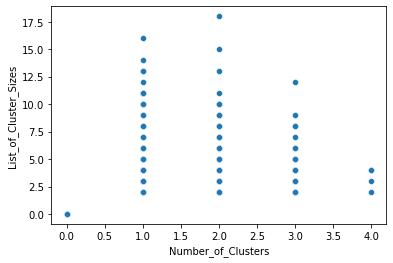

In [25]:
sns.scatterplot(cluster_sizes_explode.Number_of_Clusters, cluster_sizes_explode.List_of_Cluster_Sizes)

## What we want is the above plot to be a bit like a violin plot or something, where the size of the marker at each entry on 'list of cluster sizes' corresponds to how many times that occurs.

In [26]:
cluster_sizes_explode.head()

,Number_of_Clusters,List_of_Cluster_Sizes
0,3,9
0,3,8
0,3,2
1,2,15
1,2,7


In [27]:
cluster_list = sorted(list(cluster_sizes_explode.Number_of_Clusters.unique()))
cluster_list

[0, 1, 2, 3, 4]

In [28]:
#get just the list for clusters ==3 (will do all later)
cluster_3 = cluster_sizes_explode[cluster_sizes_explode['Number_of_Clusters']==3]

In [29]:
cluster_3

,Number_of_Clusters,List_of_Cluster_Sizes
0,3,9
0,3,8
0,3,2
3,3,6
3,3,5
...,...,...
145,3,2
145,3,3
148,3,5
148,3,2


In [30]:
cluster_3.groupby(['List_of_Cluster_Sizes']).count()

,Number_of_Clusters
List_of_Cluster_Sizes,
2,43
3,14
4,7
5,5
6,2
7,1
8,4
9,1
12,1


## Now have to figure out a way to make those the sizes of the dots

###### https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size

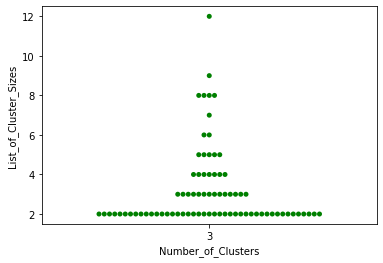

In [31]:
ax = sns.swarmplot(x="Number_of_Clusters", y="List_of_Cluster_Sizes",size=5, color='green', edgecolor='black', data=cluster_3)

## Make a plot with the x axis being the number of clusters per time point, the y-axis being the number of cells per cluster, and the marker size being proporitonal to the number of times that particular permutation occurs.

###  I think what we need to do is make a new data frame that has three columns:
* Column the first: number of clusters (1, 2, 3, 4, 5, etc)
* Column the second: the range of the cluster sizes at the specific point
* Column the third: the number of time that permutation shows up

|Number_Of_Clusters | Cluster Size | Frequency 
| --- | --- | --- |
|          1        |      4       |    6
|          1        |      7       |    3
|          2        |      8       |    9
          
The above table would give us three points, (1, 4), (1, 7), (2, 8) and their data point radius would be (6, 3, 9) respectively

In [32]:

## Time to write a new function to make this happen
### Can start with using get_cluster_sizes that was already written.  

def cluster_frequency_finder(df):
    df_sizes = get_cluster_sizes(df) #operates on the original datafarame
    cluster_sizes_df = df_sizes[['Number_of_Clusters']]  #operates on the modified smaller dataframe
    cluster_sizes_df['List_of_Cluster_Sizes'] = df_sizes[['List_of_Cluster_Sizes']] #operates on the modified smaller dataframe
    
    cluster_sizes_explode = cluster_sizes_df.explode('List_of_Cluster_Sizes')
    
    #get A LIST of the unique number of clusters
    cluster_list = sorted(list(cluster_sizes_explode.Number_of_Clusters.unique()))
    
    #get the clusters for each value in cluster list
    
    column_names =["Cluster_Size", "Frequency","Number_of_clusters",]
    output_df = pd.DataFrame(columns=column_names)
    
    for k in cluster_list:

        instances_k = cluster_sizes_explode[cluster_sizes_explode['Number_of_Clusters']==k]
        clusters_k_grouped = instances_k.groupby(['List_of_Cluster_Sizes']).count()
        clusters_k_grouped.reset_index(inplace=True)
        print(len(instances_k), 'number of time points with ', k, ' number of clusters')
        print(len(clusters_k_grouped), 'number of different sized clusters when there are ', k, ' clusters \n')
        cluster_k_repeating = [k]*len(clusters_k_grouped) #list of the cluster number repeating
        clusters_k_grouped = clusters_k_grouped.rename(columns={"List_of_Cluster_Sizes":"Cluster_Size", "Number_of_Clusters":"Frequency"})
        clusters_k_grouped['Number_of_clusters'] = cluster_k_repeating  #add the column of numbers
        output_df = output_df.append(clusters_k_grouped)
        
    return output_df.reset_index() #return the output dataframe with a numerical index

In [33]:
k = cluster_frequency_finder(results_142)

58 number of time points with  0  number of clusters
1 number of different sized clusters when there are  0  clusters 

252 number of time points with  1  number of clusters
14 number of different sized clusters when there are  1  clusters 

226 number of time points with  2  number of clusters
13 number of different sized clusters when there are  2  clusters 

78 number of time points with  3  number of clusters
9 number of different sized clusters when there are  3  clusters 

4 number of time points with  4  number of clusters
3 number of different sized clusters when there are  4  clusters 



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [34]:
k

,index,Cluster_Size,Frequency,Number_of_clusters
0,0,0,58,0
1,0,2,65,1
2,1,3,53,1
3,2,4,34,1
4,3,5,37,1
5,4,6,23,1
6,5,7,9,1
7,6,8,7,1
8,7,9,3,1
9,8,10,8,1



### uncut
results_142 
results_147 
results_218 
results_219 

### cut 
results_182 
results_192 
results_200
results_208 

In [35]:
uncut_df = results_142.append(results_147).append(results_218).append(results_219).reset_index()
cut_df = results_182.append(results_192).append(results_200).append(results_208).reset_index()

In [36]:
uncut_cluster_frequency = cluster_frequency_finder(uncut_df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


447 number of time points with  0  number of clusters
1 number of different sized clusters when there are  0  clusters 

760 number of time points with  1  number of clusters
14 number of different sized clusters when there are  1  clusters 

740 number of time points with  2  number of clusters
14 number of different sized clusters when there are  2  clusters 

402 number of time points with  3  number of clusters
10 number of different sized clusters when there are  3  clusters 

60 number of time points with  4  number of clusters
5 number of different sized clusters when there are  4  clusters 

5 number of time points with  5  number of clusters
2 number of different sized clusters when there are  5  clusters 



In [37]:

cut_cluster_frequency = cluster_frequency_finder(cut_df)

360 number of time points with  0  number of clusters
1 number of different sized clusters when there are  0  clusters 

539 number of time points with  1  number of clusters
14 number of different sized clusters when there are  1  clusters 

648 number of time points with  2  number of clusters
16 number of different sized clusters when there are  2  clusters 

291 number of time points with  3  number of clusters
10 number of different sized clusters when there are  3  clusters 

172 number of time points with  4  number of clusters
8 number of different sized clusters when there are  4  clusters 

15 number of time points with  5  number of clusters
4 number of different sized clusters when there are  5  clusters 



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [38]:
##remove the time points with 0 clusters
index_zeros_uncut = uncut_cluster_frequency[uncut_cluster_frequency['Number_of_clusters']==0].index
uncut_cluster_frequency.drop(index_zeros_uncut, inplace=True)

index_zeros_cut = cut_cluster_frequency[cut_cluster_frequency['Number_of_clusters']==0].index
cut_cluster_frequency.drop(index_zeros_cut, inplace=True)

In [39]:
from matplotlib.gridspec import GridSpec

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


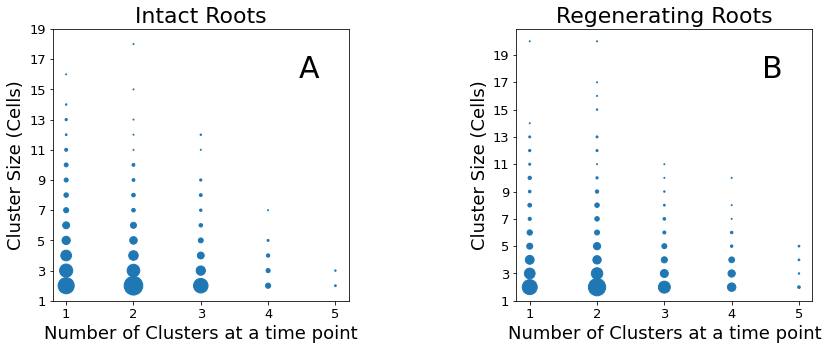

In [40]:
fig = plt.figure(constrained_layout=True, figsize=(15,5))
gs = GridSpec(5, 11, figure=fig)
ax1 = fig.add_subplot(gs[:,0:4])
s = list(uncut_cluster_frequency.Frequency*1)
plt.scatter(uncut_cluster_frequency.Number_of_clusters, uncut_cluster_frequency.Cluster_Size, s=s)
plt.xticks(np.arange(1,6, step=1),fontsize=13)
plt.yticks(np.arange(1,20, step=2),fontsize=13)
plt.title('Intact Roots',fontsize=22)
plt.xlabel('Number of Clusters at a time point', fontsize=18)
plt.ylabel('Cluster Size (Cells)', fontsize=18)
ax1.text(0.9, 0.8, 'A',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='black', fontsize=30)

ax2 = fig.add_subplot(gs[:,6:10])
s = list(cut_cluster_frequency.Frequency*1)
plt.scatter(cut_cluster_frequency.Number_of_clusters, cut_cluster_frequency.Cluster_Size, s=s)
plt.xticks(np.arange(1,6, step=1),fontsize=13)
plt.yticks(np.arange(1,20, step=2),fontsize=13)
plt.title('Regenerating Roots', fontsize=22)
plt.xlabel('Number of Clusters at a time point', fontsize=18)
plt.ylabel('Cluster Size (Cells)', fontsize=18)
ax2.text(0.9, 0.8, 'B',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='black', fontsize=30)

fig.savefig('Cluster_size_horizontal.png', facecolor='w', edgecolor='w')
fig.savefig('Cluster_size_horizontal.pdf', facecolor='w', edgecolor='w')